# IELE 4014 - Reto 5
**Felipe Velásquez Montoya - 201632422**

In [2]:
%pip install --user sklearn
%pip install --user numpy
%pip install --user pandas

  Stored in directory: /home/estudiante/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
def confusion_matrix(model, X, y):
        
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        
        for i in range(0, len(X)):

            pred = model.predict(X[i].reshape(1, -1))[0]

            if pred == 1 and y[i] == 1:
                tp+=1
            elif pred == 1 and y[i] == 0:
                fp+=1
            elif pred == 0 and y[i] == 0:
                tn+=1
            else:
                fn+=1
        labels = "True Positive", "False Positive", "True Negative", "False Negative"
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
        plt.pie([tp,fp,tn,fn], labels=labels, colors=colors, autopct='%1.1f%%')
        plt.show()
        
        return tp, fp, tn, fn

def count_occurences(y):
    ones=0
    zeroes=0
    
    for i in range(0,len(y)):
        if y[i] == 1:
            ones+=1
        else:
            zeroes+=1
    return ones, zeroes

In [37]:
data_matrix = np.loadtxt(open("./msd_genre_dataset/msd_genre_dataset_segpreproc_knime.csv", "rb"), delimiter=";", skiprows=1)

#Los datos del set de datos están agrupados por género. Es decir, primero están todas las filas que corresponden
#a 1 y después todas las que corresponden a 0. Se hace un shuffle para que, más tarde, en cross-validation
#no se creen unos modelos que predigan únicamente una clase.
X = np.random.shuffle(data_matrix)

print("Filas de la matriz: " + str(len(data_matrix)))
print("Columnas de la matriz: " + str(len(data_matrix[0])))

X = np.resize(data_matrix, (len(data_matrix), len(data_matrix[0])-1))
y = data_matrix[:,len(data_matrix[0])-1]

#Se intenta estandarizar X para lograr mejor desempeño. Sin embargo, no parece funcionar.
X = MinMaxScaler().fit_transform(X)

print("X shape" + str(X.shape))
print("y shape" + str(y.shape))
print(y)

Filas de la matriz: 8350
Columnas de la matriz: 31
X shape(8350, 30)
y shape(8350,)
[1. 1. 1. ... 1. 0. 0.]


Hacer doble click sobre la gráfica para hacer zoom.

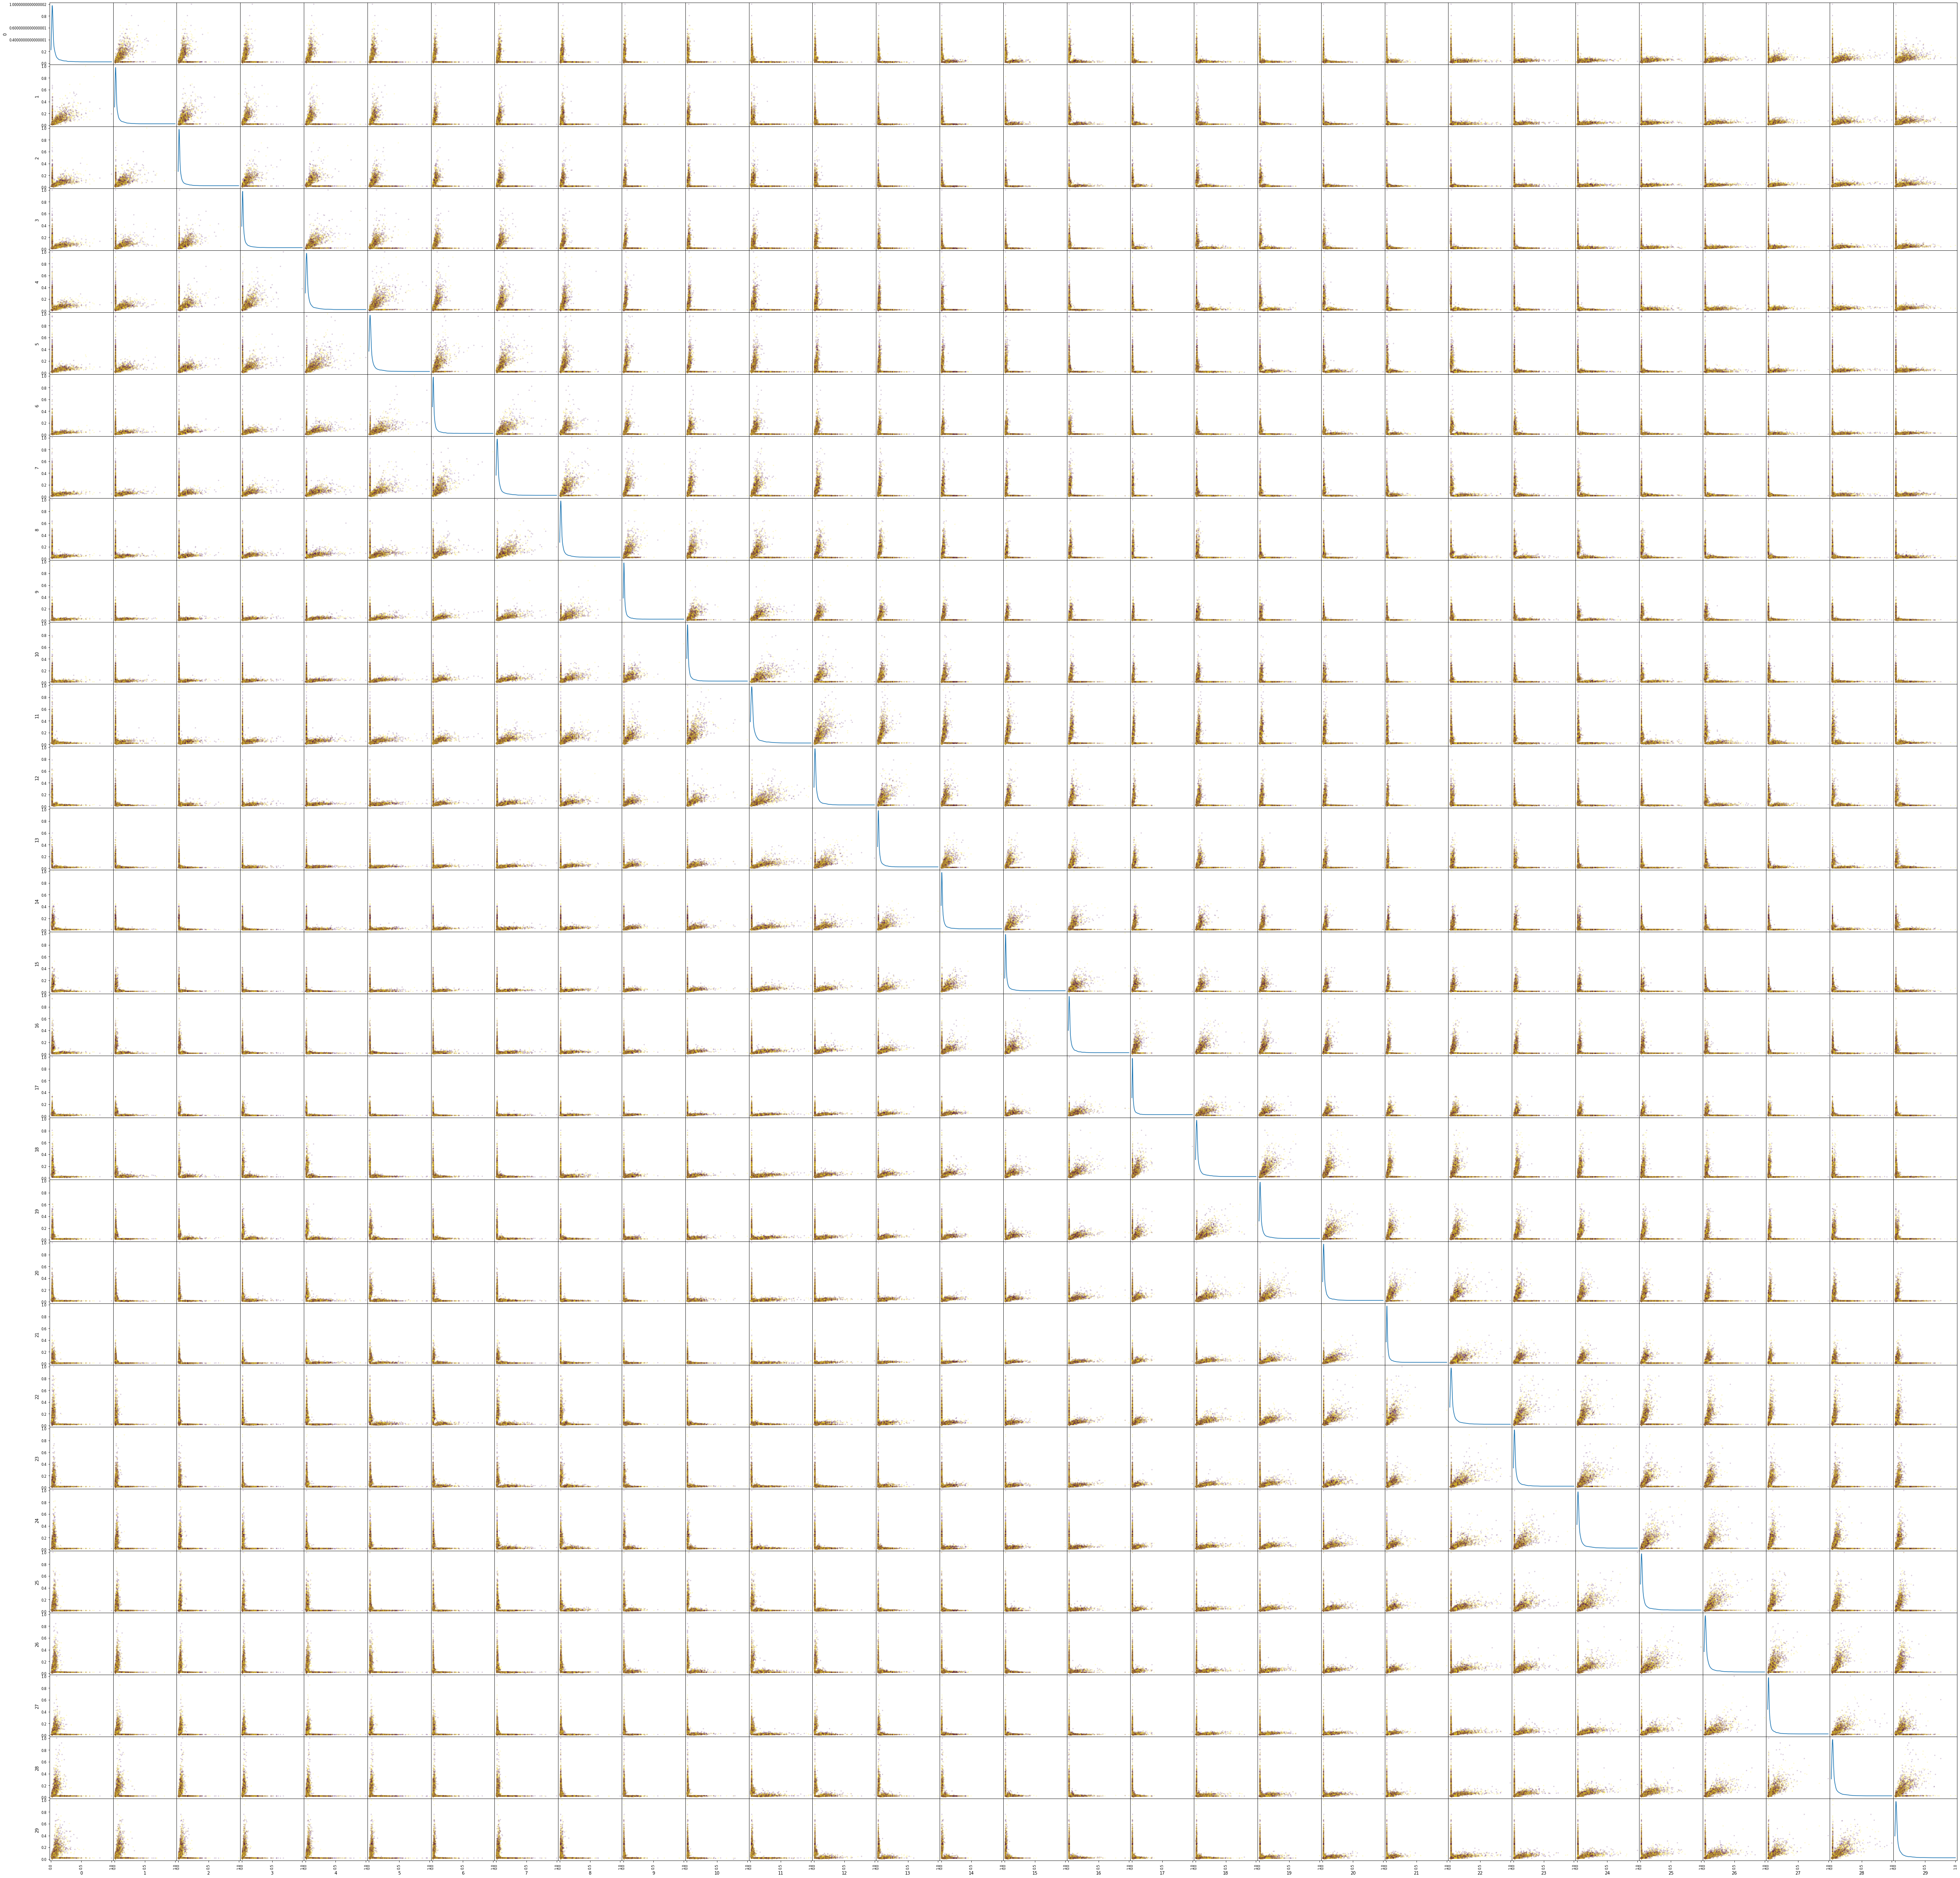

In [5]:
import pandas as pd
from pandas.plotting import scatter_matrix

data = pd.DataFrame(X)#, columns=['loudness', 'tempo', 'time_signature', 'key', 'mode', 'duration', 'avgtimbre1','avgtimbre2'
                     #             ,'avgtimbre3', 'avgtimbre4', 'avgtimbre5', 'avgtimbre6', 'avgtimbre7', 'avgtimbre8'
                     #            ,'avgtimbre9', 'avgtimbre10', 'avgtimbre11', 'avgtimbre12', 'avgtimbre1', 'avgtimbre2'
                     #            ,'avgtimbre3', 'avgtimbre4', 'avgtimbre5', 'avgtimbre6', 'avgtimbre7', 'avgtimbre8'
                     #            ,'avgtimbre9', 'avgtimbre10', 'avgtimbre11', 'avgtimbre12'])
scatter_matrix(data, alpha=0.2, figsize=(80, 80), diagonal='kde', c=y)
plt.show()

In [25]:
percentage_test = 0.2

#Porcentaje de datos dedicados a validación, relativo al número de datos de test
percentage_validation = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = percentage_test) 

In [23]:
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate="adaptive", learning_rate_init = 0.1, batch_size = 1, max_iter = 60000, verbose=True)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 0.74907845
Iteration 5, loss = 0.75127476
Iteration 6, loss = 0.74921126
Iteration 7, loss = 0.74937735
Iteration 8, loss = 0.75364402
Iteration 9, loss = 0.74730202
Iteration 10, loss = 0.75247526
Iteration 11, loss = 0.74827032
Iteration 12, loss = 0.74889305
Iteration 13, loss = 0.74938880
Iteration 14, loss = 0.74462522
Iteration 15, loss = 0.74928088
Iteration 16, loss = 0.74694483
Iteration 17, loss = 0.74932996
Iteration 18, loss = 0.75127818
Iteration 19, loss = 0.75049300
Iteration 20, loss = 0.75369230
Iteration 21, loss = 0.74395520
Iteration 22, loss = 0.74588453
Iteration 23, loss = 0.75101862
Iteration 24, loss = 0.75076306
Iteration 25, loss = 0.74948361
Iteration 26, loss = 0.74473298
Iteration 27, loss = 0.75160380
Iteration 28, loss = 0.75128860
Iteration 29, loss = 0.75177812
Iteration 30, loss = 0.74824007
Iteration 31, loss = 0.75045873
Iteration 32, loss = 0.74384527
Iterat

In [10]:
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate_init = 0.1, batch_size = 1, max_iter = 60000, verbose=True)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

Iteration 1, loss = 0.74880152
Iteration 2, loss = 0.75324718
Iteration 3, loss = 0.74707819
Iteration 4, loss = 0.74519660
Iteration 5, loss = 0.75496035
Iteration 6, loss = 0.75212065
Iteration 7, loss = 0.74842048
Iteration 8, loss = 0.75457014
Iteration 9, loss = 0.75261584
Iteration 10, loss = 0.75269559
Iteration 11, loss = 0.75348681
Iteration 12, loss = 0.74948829
Iteration 13, loss = 0.75014095
Iteration 14, loss = 0.74741700
Iteration 15, loss = 0.74713692
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Train set error probability: 0.480688622754491
Test set error probability: 0.48203592814371254


In [11]:
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate_init = 0.1, batch_size = 1, max_iter = 60000, verbose=True, random_state = 143)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

Iteration 1, loss = 0.75050073
Iteration 2, loss = 0.74513269
Iteration 3, loss = 0.75694381
Iteration 4, loss = 0.74953321
Iteration 5, loss = 0.74966892
Iteration 6, loss = 0.75037553
Iteration 7, loss = 0.74856062
Iteration 8, loss = 0.75233210
Iteration 9, loss = 0.75226694
Iteration 10, loss = 0.74627420
Iteration 11, loss = 0.74841759
Iteration 12, loss = 0.74980756
Iteration 13, loss = 0.74825216
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Train set error probability: 0.5193113772455089
Test set error probability: 0.5179640718562875


In [13]:
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate="adaptive", learning_rate_init = 1, batch_size = 1, max_iter = 60000, verbose=True, random_state = 143)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

Iteration 1, loss = 1.16819561
Iteration 2, loss = 1.13124328
Iteration 3, loss = 1.15507452
Iteration 4, loss = 1.15107086
Iteration 5, loss = 1.16915934
Iteration 6, loss = 1.15108452
Iteration 7, loss = 1.14835376
Iteration 8, loss = 1.16660776
Iteration 9, loss = 1.15648640
Iteration 10, loss = 1.14360516
Iteration 11, loss = 1.15649795
Iteration 12, loss = 1.15766153
Iteration 13, loss = 1.15640462
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.200000
Iteration 14, loss = 0.80451080
Iteration 15, loss = 0.80029640
Iteration 16, loss = 0.80119409
Iteration 17, loss = 0.80445899
Iteration 18, loss = 0.80027567
Iteration 19, loss = 0.79971267
Iteration 20, loss = 0.80026280
Iteration 21, loss = 0.79592639
Iteration 22, loss = 0.80299935
Iteration 23, loss = 0.79977664
Iteration 24, loss = 0.80346713
Iteration 25, loss = 0.80154597
Iteration 26, loss = 0.80080148
Iteration 27, loss = 0.79908824
Iteration 28, loss = 0.79811147

In [14]:
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate="adaptive", learning_rate_init = 1, batch_size = 1, max_iter = 60000, verbose=True, momentum=0.5)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

Iteration 1, loss = 0.83958462
Iteration 2, loss = 0.84044788
Iteration 3, loss = 0.84050891
Iteration 4, loss = 0.84462153
Iteration 5, loss = 0.84603060
Iteration 6, loss = 0.84300970
Iteration 7, loss = 0.84210196
Iteration 8, loss = 0.84984646
Iteration 9, loss = 0.84381156
Iteration 10, loss = 0.84249166
Iteration 11, loss = 0.84583172
Iteration 12, loss = 0.84494656
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.200000
Iteration 13, loss = 0.72019807
Iteration 14, loss = 0.71828628
Iteration 15, loss = 0.71838810
Iteration 16, loss = 0.71909201
Iteration 17, loss = 0.71767807
Iteration 18, loss = 0.72028197
Iteration 19, loss = 0.71602047
Iteration 20, loss = 0.71738847
Iteration 21, loss = 0.72009456
Iteration 22, loss = 0.71825752
Iteration 23, loss = 0.71582597
Iteration 24, loss = 0.71843717
Iteration 25, loss = 0.71945833
Iteration 26, loss = 0.71734539
Iteration 27, loss = 0.71927097
Iteration 28, loss = 0.71625277

In [17]:
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate="adaptive", learning_rate_init = 0.00001, batch_size = 1, max_iter = 60000, verbose=True, momentum=0.5)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

Iteration 1, loss = 0.70289364
Iteration 2, loss = 0.70195306
Iteration 3, loss = 0.70109990
Iteration 4, loss = 0.70032563
Iteration 5, loss = 0.69962135
Iteration 6, loss = 0.69898193
Iteration 7, loss = 0.69840095
Iteration 8, loss = 0.69787369
Iteration 9, loss = 0.69739491
Iteration 10, loss = 0.69695881
Iteration 11, loss = 0.69656311
Iteration 12, loss = 0.69620527
Iteration 13, loss = 0.69588054
Iteration 14, loss = 0.69558608
Iteration 15, loss = 0.69531898
Iteration 16, loss = 0.69507610
Iteration 17, loss = 0.69485687
Iteration 18, loss = 0.69465819
Iteration 19, loss = 0.69447799
Iteration 20, loss = 0.69431496
Iteration 21, loss = 0.69416782
Iteration 22, loss = 0.69403403
Iteration 23, loss = 0.69391245
Iteration 24, loss = 0.69380252
Iteration 25, loss = 0.69370303
Iteration 26, loss = 0.69361314
Iteration 27, loss = 0.69353144
Iteration 28, loss = 0.69345771
Iteration 29, loss = 0.69339113
Iteration 30, loss = 0.69333076
Iteration 31, loss = 0.69327611
Iteration 32, los

In [18]:
net = MLPClassifier(solver='sgd', activation = "tanh", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate="adaptive", learning_rate_init = 0.00001, batch_size = 1, max_iter = 60000, verbose=True, momentum=0.5)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

Iteration 1, loss = 0.75708652
Iteration 2, loss = 0.74693098
Iteration 3, loss = 0.73834027
Iteration 4, loss = 0.73107660
Iteration 5, loss = 0.72495703
Iteration 6, loss = 0.71981906
Iteration 7, loss = 0.71550682
Iteration 8, loss = 0.71189457
Iteration 9, loss = 0.70887714
Iteration 10, loss = 0.70636177
Iteration 11, loss = 0.70426690
Iteration 12, loss = 0.70252639
Iteration 13, loss = 0.70107985
Iteration 14, loss = 0.69986786
Iteration 15, loss = 0.69886158
Iteration 16, loss = 0.69802469
Iteration 17, loss = 0.69733302
Iteration 18, loss = 0.69676150
Iteration 19, loss = 0.69628849
Iteration 20, loss = 0.69589614
Iteration 21, loss = 0.69556987
Iteration 22, loss = 0.69529991
Iteration 23, loss = 0.69507542
Iteration 24, loss = 0.69489016
Iteration 25, loss = 0.69473735
Iteration 26, loss = 0.69461011
Iteration 27, loss = 0.69450436
Iteration 28, loss = 0.69441560
Iteration 29, loss = 0.69434316
Iteration 30, loss = 0.69428377
Iteration 31, loss = 0.69423472
Iteration 32, los

In [ ]:
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate="adaptive", learning_rate_init = 0.1, batch_size = 1,
                    max_iter = 60000, verbose=True, momentum=0.5, tol=0.000000000000001)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

ones: 3474| zeroes: 3206


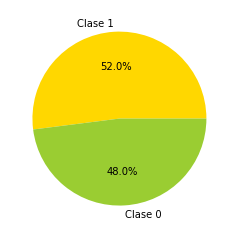

In [11]:
one, zero = count_occurences(y_train)

print("ones: %s| zeroes: %s" % (one, zero))

labels = "Clase 1", "Clase 0"
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie([one, zero], labels= labels, colors=colors, autopct='%1.1f%%')
plt.show()

In [22]:
kf = KFold(n_splits=math.floor(1/percentage_validation))

n_max = 100
scores = []
best_neurons=0
best_score=1

for n in range(2, n_max+1, 5):

    i=0
    score=0

    #Validación cruzada de la red neuronal
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_validate = X_train[train_index], X_train[test_index]
        y_train_cv, y_validate = y_train[train_index], y_train[test_index]
        net = MLPClassifier(solver='sgd',hidden_layer_sizes=(n,), activation = "relu", 
                            alpha=0, learning_rate_init = 0.01)
        net.fit(X_train_cv,y_train_cv)
    
        score+=net.score(X_validate, y_validate)
        i+=1
    
    score = 1- (score/i)
    scores.append(score)
    
    if score < best_score:
        best_score = score
        best_neurons = n
    
    print("Average error probability for %s neurons in one hidden layer: %s" % (n, score))

print("Lowest error probability: %s for model with %s neurons" % (best_score, best_neurons))

Average error probability for 2 neurons in one hidden layer: 0.4799401197604791
Average error probability for 7 neurons in one hidden layer: 0.4835329341317365
Average error probability for 12 neurons in one hidden layer: 0.4847305389221558
Average error probability for 17 neurons in one hidden layer: 0.48263473053892214
Average error probability for 22 neurons in one hidden layer: 0.48158682634730543
Average error probability for 27 neurons in one hidden layer: 0.4806886227544911
Average error probability for 32 neurons in one hidden layer: 0.48368263473053896
Average error probability for 37 neurons in one hidden layer: 0.48547904191616764
Average error probability for 42 neurons in one hidden layer: 0.47964071856287427
Average error probability for 47 neurons in one hidden layer: 0.4875748502994012
Average error probability for 52 neurons in one hidden layer: 0.482185628742515
Average error probability for 57 neurons in one hidden layer: 0.48158682634730543
Average error probability

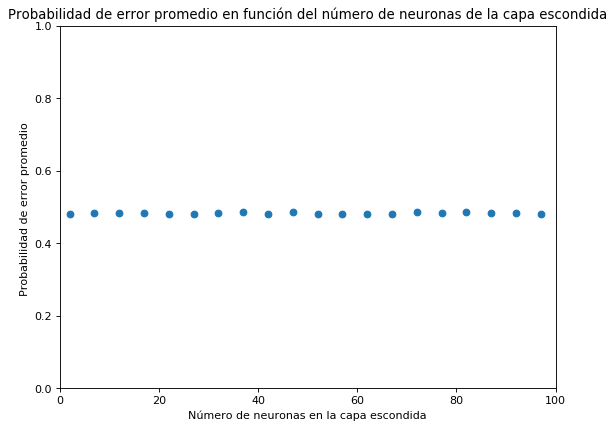

In [23]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(range(2, n_max, 5), scores, 'o')
plt.axis([0, 100, 0, 1])
plt.xlabel('Número de neuronas en la capa escondida')
plt.ylabel('Probabilidad de error promedio ')
plt.title('Probabilidad de error promedio en función del número de neuronas de la capa escondida')
plt.show()

Probabilidad de error del modelo con 42 neuronas en una capa escondida: 0.4892215568862276


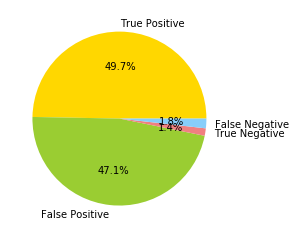

Matriz de confusión: TP: 830|FP: 787|TN: 23|FN: 30|


In [24]:
#Ahora se entrena el mejor modelo con todos los datos de entrenamiento y se prueban los datos de validación

final_classifier = MLPClassifier(solver='sgd',hidden_layer_sizes=(best_neurons,), 
                                 activation = "relu", alpha=0, learning_rate_init = 0.01)
final_classifier.fit(X_train, y_train)

print("Probabilidad de error del modelo con %s neuronas en una capa escondida: %s" 
      % (best_neurons, 1-final_classifier.score(X_test, y_test)))

tp, fp, tn, fn = confusion_matrix(final_classifier, X_test, y_test)
print("Matriz de confusión: TP: %s|FP: %s|TN: %s|FN: %s|" % (tp, fp, tn, fn))


In [25]:
#Ahora, se toma el número de neuronas con mayor desempeño en una capa escondida y, con este número de neuronas, 
#se prueban n capas escondidas entre 2 y 100 a intervalos de 5.

kf = KFold(n_splits=math.floor(1/percentage_validation))

n_max = 20
hl_scores = []
best_layers=0
best_score=1

hid_tuple = ()

for n in range(2, n_max+1, 1):
    
    #Ahora expande la tupla, insertando best_neurons n veces hasta llegar a n
    
    hid_tuple = list(hid_tuple)
    while len(hid_tuple) != n:
        hid_tuple.append(best_neurons)
    
    hid_tuple = tuple(hid_tuple)

    i=0
    score=0

    #Validación cruzada de la red neuronal
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_validate = X_train[train_index], X_train[test_index]
        y_train_cv, y_validate = y_train[train_index], y_train[test_index]
        net = MLPClassifier(solver='sgd', hidden_layer_sizes=hid_tuple, 
                           activation = "relu", alpha=0, learning_rate_init = 0.01)
        net.fit(X_train_cv,y_train_cv)
    
        score+=net.score(X_validate, y_validate)
        i+=1
    
    score = 1- (score/i)
    hl_scores.append(score)
    
    if score < best_score:
        best_score = score
        best_layers = n
    
    print("Average error probability for %s neurons in %s hidden layers: %s" % (best_neurons, n,score))
    
    
print("Lowest error probability: %s for model with %s hidden layers" % (best_score, best_layers))



Average error probability for 42 neurons in 2 hidden layers: 0.48038922155688624
Average error probability for 42 neurons in 3 hidden layers: 0.4794910179640719
Average error probability for 42 neurons in 4 hidden layers: 0.48038922155688624
Average error probability for 42 neurons in 5 hidden layers: 0.4827844311377246
Average error probability for 42 neurons in 6 hidden layers: 0.4799401197604791
Average error probability for 42 neurons in 7 hidden layers: 0.4799401197604791
Average error probability for 42 neurons in 8 hidden layers: 0.4799401197604791
Average error probability for 42 neurons in 9 hidden layers: 0.4799401197604791
Average error probability for 42 neurons in 10 hidden layers: 0.4799401197604791
Average error probability for 42 neurons in 11 hidden layers: 0.4799401197604791
Average error probability for 42 neurons in 12 hidden layers: 0.4799401197604791
Average error probability for 42 neurons in 13 hidden layers: 0.4799401197604791
Average error probability for 42 n

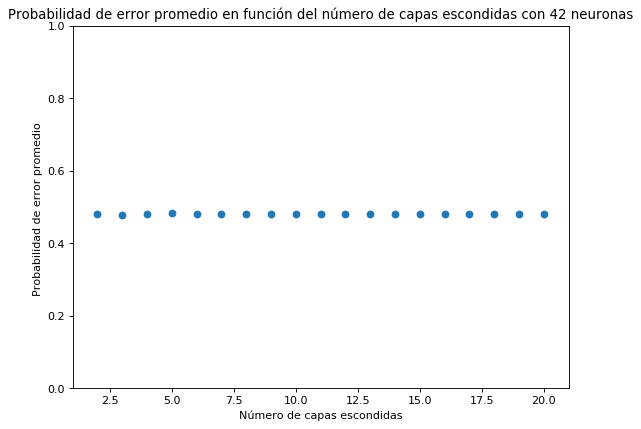

In [26]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(range(2, n_max+1, 1), hl_scores, 'o')
plt.axis([1, 21, 0, 1])
plt.xlabel('Número de capas escondidas')
plt.ylabel('Probabilidad de error promedio ')
plt.title('Probabilidad de error promedio en función del número de capas escondidas con %s neuronas' 
          % best_neurons)
plt.show()

Probabilidad de error del modelo con 42 neuronas en 3 capas escondida: 0.4850299401197605


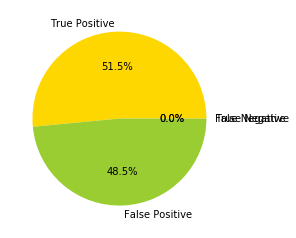

TP: 860|FP: 810|TN: 0|FN: 0|


In [27]:
#Ahora se entrena el mejor modelo con todos los datos de entrenamiento y se prueban los datos de validación

hid_tuple_final = ()
hid_tuple_final = list(hid_tuple_final)

while len(hid_tuple_final) != best_layers:
    hid_tuple_final.append(best_neurons)
    
hid_tuple_final = tuple(hid_tuple_final)

final_classifier = MLPClassifier(solver='sgd',hidden_layer_sizes=hid_tuple_final, 
                                 activation = "relu", alpha=0, learning_rate_init = 0.01)
final_classifier.fit(X_train, y_train)

print("Probabilidad de error del modelo con %s neuronas en %s capas escondida: %s" 
      % (best_neurons, best_layers, 1-final_classifier.score(X_test, y_test)))

tp, fp, tn, fn = confusion_matrix(final_classifier, X_test, y_test)
print("TP: %s|FP: %s|TN: %s|FN: %s|" % (tp, fp, tn, fn))

De aquí en adelante es "Machete", intentar con un número obsceno de neuronas, PCA, etc...

Pareciera que no hay forma de "partir" los datos con una serie de hiperplanos, parece que la red aprende a siempre predecir la clase de mayor frecuencia para, así, minimizar su error.

In [28]:
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(8000,), learning_rate_init = 0.01)
net.fit(X_train,y_train)
print("Train set error probability: %s" % (1 - net.score(X_train, y_train)))
print("Test set error probability: %s" % (1 - net.score(X_test, y_test)))

Train set error probability: 0.479940119760479
Test set error probability: 0.4850299401197605


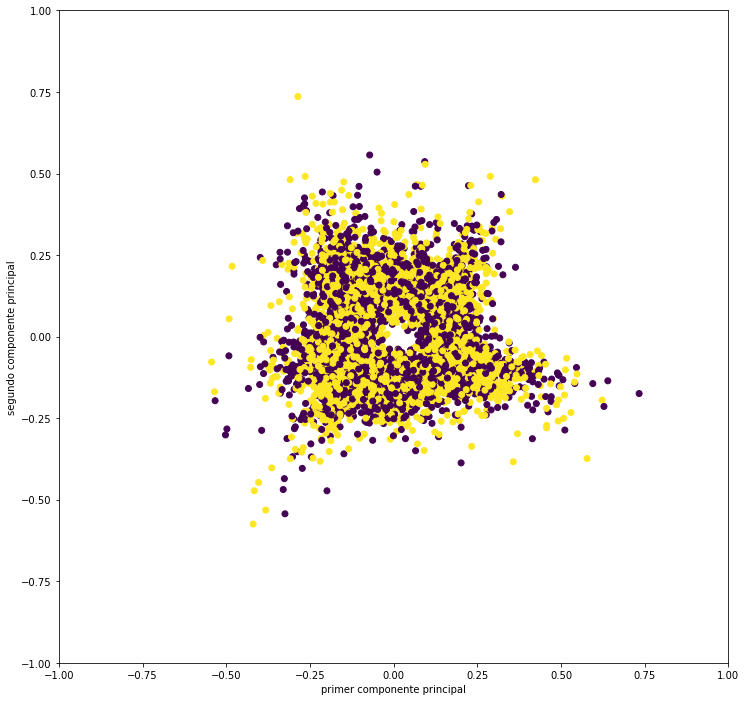

In [21]:
#intentar ver si PCA ayuda en algo
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

#graficar datos en 2D tras reducción de dimensionalidades
plt.figure(figsize=(12, 12))
dic ={
    'a': X_pca[:,0],
    'b': X_pca[:,1],
    'c': y
}

plt.scatter('a','b', c = 'c', data = dic)
plt.axis([-1, 1, -1, 1])
plt.xlabel('primer componente principal')
plt.ylabel('segundo componente principal')
plt.show()

In [34]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = percentage_test) 

kf = KFold(n_splits=math.floor(1/percentage_validation))

n_max = 100
scores = []
best_neurons=0
best_score=1

for n in range(2, n_max+1, 5):

    i=0
    score=0

    #Validación cruzada de la red neuronal
    for train_index, test_index in kf.split(X_train_pca):
        X_train_cv, X_validate = X_train_pca[train_index], X_train_pca[test_index]
        y_train_cv, y_validate = y_train_pca[train_index], y_train_pca[test_index]
        net = MLPClassifier(solver='sgd' ,hidden_layer_sizes=(n,),
                            activation = "relu", alpha=0, learning_rate_init = 0.01)
        net.fit(X_train_cv,y_train_cv)
    
        score+=net.score(X_validate, y_validate)
        i+=1
    
    score = 1- (score/i)
    scores.append(score)
    
    if score < best_score:
        best_score = score
        best_neurons = n
    
    print("Average error probability for %s neurons in one hidden layer: %s" % (n, score))

print("Lowest error probability: %s for model with %s neurons" % (best_score, best_neurons))

Average error probability for 2 neurons in one hidden layer: 0.48592814371257487
Average error probability for 7 neurons in one hidden layer: 0.4776946107784432
Average error probability for 12 neurons in one hidden layer: 0.48203592814371266
Average error probability for 17 neurons in one hidden layer: 0.4776946107784432
Average error probability for 22 neurons in one hidden layer: 0.4805389221556886
Average error probability for 27 neurons in one hidden layer: 0.4812874251497006
Average error probability for 32 neurons in one hidden layer: 0.4799401197604791
Average error probability for 37 neurons in one hidden layer: 0.47964071856287427
Average error probability for 42 neurons in one hidden layer: 0.47874251497005993
Average error probability for 47 neurons in one hidden layer: 0.47964071856287427
Average error probability for 52 neurons in one hidden layer: 0.47874251497005993
Average error probability for 57 neurons in one hidden layer: 0.4818862275449102
Average error probabilit

Probabilidad de error del modelo con 7 neuronas en una capa escondida: 0.4880239520958084


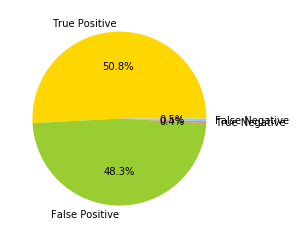

Matriz de confusión: TP: 849|FP: 807|TN: 6|FN: 8|


In [35]:
#Ahora se entrena el mejor modelo con todos los datos de entrenamiento y se prueban los datos de validación

final_classifier = MLPClassifier(solver='sgd',hidden_layer_sizes=(best_neurons,), 
                                 activation = "relu", alpha=0, learning_rate_init = 0.01)
final_classifier.fit(X_train_pca, y_train_pca)

print("Probabilidad de error del modelo con %s neuronas en una capa escondida: %s" 
      % (best_neurons, 1-final_classifier.score(X_test_pca, y_test_pca)))

tp, fp, tn, fn = confusion_matrix(final_classifier, X_test_pca, y_test_pca)
print("Matriz de confusión: TP: %s|FP: %s|TN: %s|FN: %s|" % (tp, fp, tn, fn))

In [36]:
#Ahora, se toma el número de neuronas con mayor desempeño en una capa escondida y, con este número de neuronas, 
#se prueban n capas escondidas entre 2 y 100 a intervalos de 5.

kf = KFold(n_splits=math.floor(1/percentage_validation))

n_max = 20
hl_scores = []
best_layers=0
best_score=1

hid_tuple = ()

for n in range(2, n_max+1, 1):
    
    #Ahora expande la tupla, insertando best_neurons n veces hasta llegar a n
    
    hid_tuple = list(hid_tuple)
    while len(hid_tuple) != n:
        hid_tuple.append(best_neurons)
    
    hid_tuple = tuple(hid_tuple)

    i=0
    score=0

    #Validación cruzada de la red neuronal
    for train_index, test_index in kf.split(X_train_pca):
        X_train_cv, X_validate = X_train_pca[train_index], X_train_pca[test_index]
        y_train_cv, y_validate = y_train_pca[train_index], y_train_pca[test_index]
        net = MLPClassifier(solver='sgd', hidden_layer_sizes=hid_tuple, 
                           activation = "relu", alpha=0, learning_rate_init = 0.01)
        net.fit(X_train_cv,y_train_cv)
    
        score+=net.score(X_validate, y_validate)
        i+=1
    
    score = 1- (score/i)
    hl_scores.append(score)
    
    if score < best_score:
        best_score = score
        best_layers = n
    
    print("Average error probability for %s neurons in %s hidden layers: %s" % (best_neurons, n,score))
    
    
print("Lowest error probability: %s for model with %s hidden layers" % (best_score, best_layers))

Average error probability for 7 neurons in 2 hidden layers: 0.48383233532934145
Average error probability for 7 neurons in 3 hidden layers: 0.47979041916167664
Average error probability for 7 neurons in 4 hidden layers: 0.47904191616766467
Average error probability for 7 neurons in 5 hidden layers: 0.47919161676646715
Average error probability for 7 neurons in 6 hidden layers: 0.4794910179640719
Average error probability for 7 neurons in 7 hidden layers: 0.4794910179640719
Average error probability for 7 neurons in 8 hidden layers: 0.4794910179640719
Average error probability for 7 neurons in 9 hidden layers: 0.4794910179640719
Average error probability for 7 neurons in 10 hidden layers: 0.4794910179640719
Average error probability for 7 neurons in 11 hidden layers: 0.4794910179640719
Average error probability for 7 neurons in 12 hidden layers: 0.4794910179640719
Average error probability for 7 neurons in 13 hidden layers: 0.4794910179640719
Average error probability for 7 neurons in 1

Probabilidad de error del modelo con 7 neuronas en 4 capas escondida: 0.4868263473053892


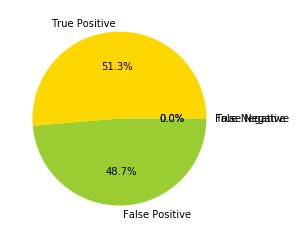

TP: 857|FP: 813|TN: 0|FN: 0|


In [38]:
#Ahora se entrena el mejor modelo con todos los datos de entrenamiento y se prueban los datos de validación

hid_tuple_final = ()
hid_tuple_final = list(hid_tuple_final)

while len(hid_tuple_final) != best_layers:
    hid_tuple_final.append(best_neurons)
    
hid_tuple_final = tuple(hid_tuple_final)

final_classifier = MLPClassifier(solver='sgd',hidden_layer_sizes=hid_tuple_final, 
                                 activation = "relu", alpha=0, learning_rate_init = 0.01)
final_classifier.fit(X_train_pca, y_train_pca)

print("Probabilidad de error del modelo con %s neuronas en %s capas escondida: %s" 
      % (best_neurons, best_layers, 1-final_classifier.score(X_test_pca, y_test_pca)))

tp, fp, tn, fn = confusion_matrix(final_classifier, X_test_pca, y_test_pca)
print("TP: %s|FP: %s|TN: %s|FN: %s|" % (tp, fp, tn, fn))

In [ ]:
data_matrix?2 = np.loadtxt(open("./msd_genre_dataset/msd_genre_dataset_prueba.csv", "rb"), delimiter=";", skiprows=1)

#Los datos del set de datos están agrupados por género. Es decir, primero están todas las filas que corresponden
#a 1 y después todas las que corresponden a 0. Se hace un shuffle para que, más tarde, en cross-validation
#no se creen unos modelos que predigan únicamente una clase.
X = np.random.shuffle(data_matrix)

print("Filas de la matriz: " + str(len(data_matrix)))
print("Columnas de la matriz: " + str(len(data_matrix[0])))

X = np.resize(data_matrix, (len(data_matrix), len(data_matrix[0])-1))
y = data_matrix[:,len(data_matrix[0])-1]

#Se intenta estandarizar X para lograr mejor desempeño. Sin embargo, no parece funcionar.
X = MinMaxScaler().fit_transform(X)

print("X shape" + str(X.shape))
print("y shape" + str(y.shape))

In [33]:
data_matrix_notim = np.loadtxt(open("./msd_genre_dataset/msd_genre_dataset_prueba_timbre.csv", "rb"), delimiter=",", skiprows=0)

#Los datos del set de datos están agrupados por género. Es decir, primero están todas las filas que corresponden
#a 1 y después todas las que corresponden a 0. Se hace un shuffle para que, más tarde, en cross-validation
#no se creen unos modelos que predigan únicamente una clase.
X_notim = np.random.shuffle(data_matrix_notim)

print("Filas de la matriz: " + str(len(data_matrix_notim)))
print("Columnas de la matriz: " + str(len(data_matrix_notim[0])))

X_notim = np.resize(data_matrix_notim, (len(data_matrix_notim), len(data_matrix_notim[0])-1))
y_notim = data_matrix[:,len(data_matrix_notim[0])-1]
print

X_notim = X_notim.astype('float')


#Se intenta estandarizar X para lograr mejor desempeño. Sin embargo, no parece funcionar.
X_notim = MinMaxScaler().fit_transform(X_notim)

print("X shape" + str(X_notim.shape))
print("y shape" + str(y_notim.shape))

Filas de la matriz: 8350
Columnas de la matriz: 7
X shape(8350, 6)
y shape(8350,)


In [36]:
print(data_matrix_notim)
print(X_notim)
print(y_notim)
net = MLPClassifier(solver='sgd', activation = "relu", alpha=0,
                    hidden_layer_sizes=(10,), learning_rate="adaptive", learning_rate_init = 0.1, batch_size = 1, max_iter = 60000, verbose=True)
net.fit(X_notim,y_notim)
print("Train set error probability: %s" % (1 - net.score(X_notim, y_notim)))
print("Test set error probability: %s" % (1 - net.score(X_notim, y_notim)))

[[-1.1858000e+04  9.9977000e+04  4.0000000e+00 ...  1.0000000e+00
   2.4416608e+02  0.0000000e+00]
 [-2.1876000e+04  1.5106300e+05  3.0000000e+00 ...  1.0000000e+00
   3.1890240e+02  1.0000000e+00]
 [-1.5609000e+04  8.3711000e+04  4.0000000e+00 ...  1.0000000e+00
   5.1913098e+02  1.0000000e+00]
 ...
 [-5.8530000e+03  9.6004000e+04  5.0000000e+00 ...  0.0000000e+00
   2.4016934e+02  0.0000000e+00]
 [-2.1658000e+04  1.3215700e+05  1.0000000e+00 ...  0.0000000e+00
   3.2574240e+01  1.0000000e+00]
 [-9.2300000e+00  1.8802900e+05  4.0000000e+00 ...  1.0000000e+00
   3.2046975e+02  1.0000000e+00]]
[[0.03806534 0.19869103 0.04913437 0.08578934 0.06579833 0.03615256]
 [0.05463943 0.02699938 0.23357782 0.08577562 0.06579653 0.03589255]
 [0.05508517 0.05782421 0.03007085 0.27715325 0.06580373 0.03589148]
 ...
 [0.05464083 0.05826062 0.04913071 0.0512875  0.06591218 0.03589469]
 [0.05464223 0.05782421 0.04961328 0.08577105 0.044141   0.19175306]
 [0.05464502 0.0578383  0.04913071 0.08626362 0.06

ValueError: Unknown label type: (array([45.86148859, 36.18108736, 29.30749383, ..., 44.21451053,
       44.41626016, 32.40117211]),)